Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Цель исследования:
1. Изучить данные для анализа и построения гипотез.
2. Проанализировать данные пользователей и сделать выводы: сколько игр выпускалось в разные годы, как менялись продажи по платформам, какие платформы лидируют по продажам, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков, соотнесьти выводы с продажами игр на других платформах, посмотрить на общее распределение игр по жанрам какие из них самые прибыльные, выделяют ли жанры с высокими и низкими продажами. 
5. Проверить следующие гипотезы: 
    
    5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
    
    5.2 Средние пользовательские рейтинги жанров Action и Sports разные. 
    
Ход исследования:
    
1. Обзор данных.
2. Подготовка данных.
3. Исследовательский анализ данных.
4. Портрет пользователя каждого региона.
5. Проверка гипотез.    
6. Написание общего вывода. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from scipy.stats import binom
import matplotlib.pyplot as plt
import seaborn as sns

## Шаг 1. Откройте файл с данными и изучите общую информацию

Загрузим датафрейм в переменную 'games'.

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Промежуточный вывод**

Считали CSV-файлы с данными с помощью библиотеки pandas и сохранили их в датафреймы. Предварительный анализ показывает что в данных присутствуют пропуски, некорректные типы данных.

games содержит:

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке
- EU_sales — продажи в Европе
- JP_sales — продажи в Японии
- Other_sales — продажи в других странах
- Critic_Score — оценка критиков
- User_Score — оценка пользователей
- Rating — рейтинг от организации ESRB

## Шаг 2. Подготовка данных 

### Замените названия столбцов (приведите к нижнему регистру)

In [5]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [6]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Промежуточный вывод**

Названия столбцов приведены к нижнему регистру

### Обработайте пропуски при необходимости

Выведем долю пропущенных значений для каждого столбца датафрейма.

In [7]:
pd.DataFrame(games.isna().mean()*100).style.set_precision(1).background_gradient('coolwarm')

,0
name,0.0
platform,0.0
year_of_release,1.6
genre,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0
other_sales,0.0
critic_score,51.3
user_score,40.1


Выведем на экран только количество пропусков по столбцам.

In [8]:
games.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].sort_values(ascending=True)

name                  2
genre                 2
year_of_release     269
user_score         6701
rating             6766
critic_score       8578
Name: nans, dtype: int64

In [9]:
games[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих 2-х строках отсудствует много значений, которые не можем заполнить поэтому просто удалим их

In [10]:
games = games.dropna(subset = ['name'])

In [11]:
games.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].sort_values(ascending=True)

year_of_release     269
user_score         6699
rating             6764
critic_score       8576
Name: nans, dtype: int64

In [12]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


В колонке user_score, tbd подразумевает что игра не имеет достаточно рейтингов. Но нам нужно заполнить данные числом, поэтому заменим на тип данных c tbd на float, а затем заполним пустые значения -1 

In [13]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')

In [14]:
games[games['user_score'] == 'tbd']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Пропуски в столбце rating заполним unknown так как мы не можем найти рейтинги.

In [15]:
games['rating'] = games['rating'].fillna('unknown')

Пропуски в столбце user_score и critic_score заполним значениями -1.

In [16]:
games['user_score'] = games['user_score'].fillna(-1)

In [17]:
games['critic_score'] = games['critic_score'].fillna(-1)

Пропуски в столбце year_of_release удалим.

In [18]:
games = games[games['year_of_release'].isna() == False]
games['year_of_release'].isna().sum()

0

In [19]:
games.isna().sum().to_frame(name="nans").query("nans > 0")["nans"].sort_values(ascending=True)

Series([], Name: nans, dtype: int64)

Проверим на наличие дубликатов.

In [20]:
games[games.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.0,0.0,83.0,5.5,E


Выявлен дубликат на строке 16230, удалим его. 

In [21]:
games = games.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

In [22]:
games[games.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [23]:
games.duplicated().sum()

0

In [24]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unknown
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unknown


In [25]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


**Промежуточный вывод**

Дубликаты отсудствуют в датафрейме, а также в столбцах имени, платформе и году релиза. В колонке name и genre отсудствует много значений, которые не можем заполнить поэтому удалим их.

В колонке user_score, tbd подразумевает что игра не имеет рейтингов. Но нам нужно заполнить данные числом, поэтому заменим на тип данных c tbd на float, а затем заполним пустые значения -1

Пропуски в столбце rating заполним unknown так как мы не можем найти рейтинги.

Пропуски в столбце user_score и critic_score заполним значениями -1.

Пропуски в столбце year_of_release удалим.

Выявлен дубликат на строке 16230, удалили его.

### Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

В колонке year_of_release содержится год выпуска и тип данных - число с десятичными значениями, переменим на целое число int. В колонке user_score содержатся данные о рейтингах, но тип данных в колонке названия, изменина на тип данных на float, а также сделаем, чтобы все данные были с десятичными значениями. 

In [26]:
games['year_of_release'] = games['year_of_release'].astype(int)

In [27]:
games['user_score'] = games['user_score'].astype('float')

In [28]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unknown
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unknown


**Промежуточный вывод**

В колонке year_of_release содержится год выпуска и тип данных - число с десятичными значениями, переменим на целое число int. В колонке user_score содержатся данные о рейтингах, но тип данных в колонке названия, изменина на тип данных на float.

### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [29]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

In [30]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,unknown,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1.0,unknown,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,-1.0,-1.0,unknown,28.31


**Промежуточный вывод**

Добавила новую колонку total_sales для суммарные продажи во всех регионах.

**Вывод по разделу**

**2.1** Название столбцов приведено к регистру в lower_case. 

**2.2**  Дубликаты отсудствуют в датафрейме, а также в столбцах имени, платформе и году релиза. В колонке name и genre отсудствует много значений, которые не можем заполнить поэтому удалим их.

В колонке user_score, tbd подразумевает что игра не имеет рейтингов. Но нам нужно заполнить данные числом, поэтому заменим на тип данных c tbd на float, а затем заполним пустые значения -1

Пропуски в столбце rating заполним unknown так как мы не можем найти рейтинги.

Пропуски в столбце user_score и critic_score заполним значениями -1.

Пропуски в столбце year_of_release удалим.

Выявлен дубликат на строке 16230, удалили его.

**2.3** В колонках year_of_release и user_score изменены типы данных столбцов: 'year_of_release' на int, 'user_score' на float 

**2.4** Посчитала суммарные продажи во всех регионах и запизала в отдельный столбец total_sales. 

In [31]:
# Комментарий ревьюера 0
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Instant Artist'
 '¡Shin Chan Flipa en colores!']
n

## Шаг 3. Проведем исследовательский анализ данных

### Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды

Посмотрим сколько выпускалось игр по годам.

In [32]:
games_by_year = games.groupby('year_of_release')['name'].count()
games_by_year

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     652
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

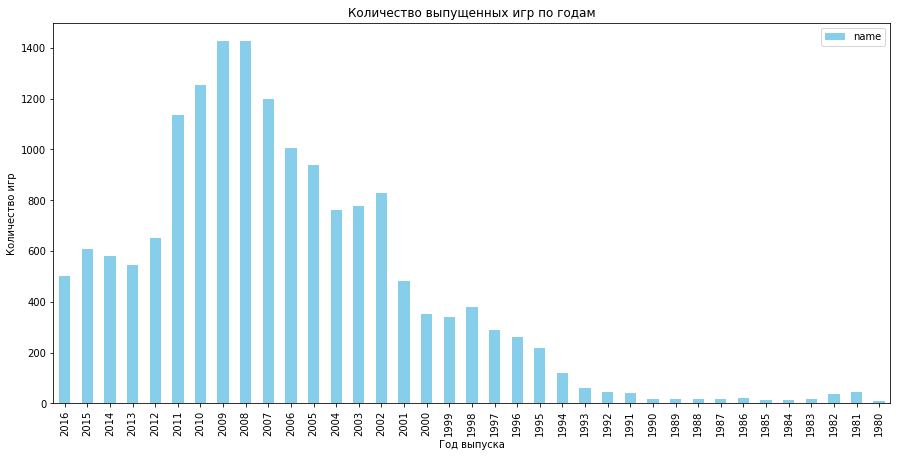

In [33]:
year_of_release = games.pivot_table(index = 'year_of_release',
        values = 'name', aggfunc = 'count').sort_values('year_of_release', ascending = False)

year_of_release.plot(kind='bar', figsize=(15, 7), color ='skyblue')
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Промежуточный вывод**

Больше всего игр выпускалось в 2008 и 2009 годах, далее идет 2010, 2007, 2011. До 1994 года выпускалось меньше 100 игр в год, поэтому данные до 1995 не так важны.

### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы.

Посмотрим, как менялись продажи по платформам.

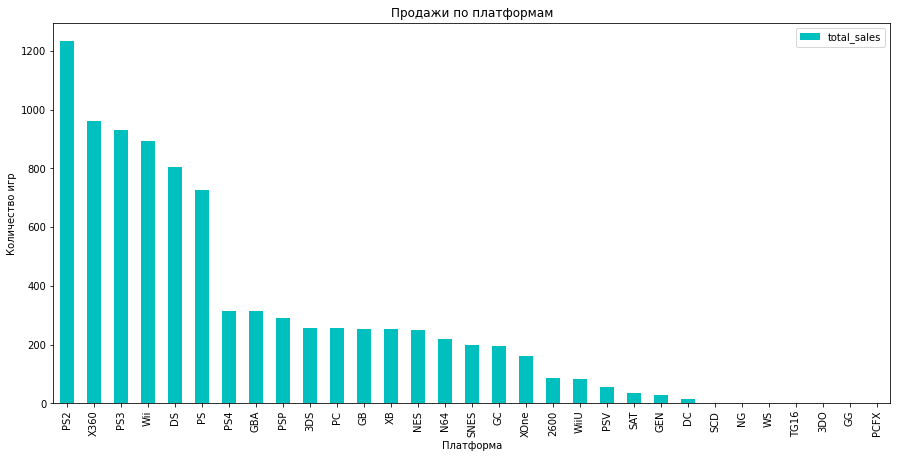

In [34]:
platform_sales = games.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values('total_sales',ascending=False)

platform_sales.plot(kind='bar', figsize=(15, 7), color = 'c')
plt.title('Продажи по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество игр')
plt.show()

In [35]:
platform_sales.head(6)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.33
Wii,891.18
DS,802.78
PS,727.58


Больше всего продаж на платформах PlayStation 2 и Xbox 360, PS3, Wii, DS, далее PlayStation.

Постройте распределение по годам для платформ с большими продажами.

In [36]:
sales_per_platform = (games.pivot_table(index=['year_of_release', 'platform'], 
                                        values='total_sales', aggfunc='sum').reset_index())

Построим график распределение по годам для платформ с наибольшими суммарными продажами 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS'.

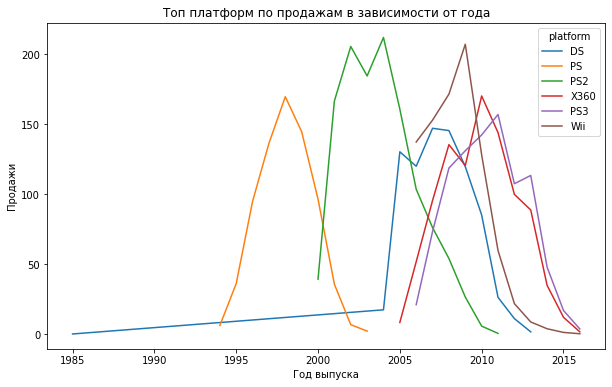

In [37]:
platform_sales_top = sales_per_platform[(sales_per_platform['platform'] == 'PS2') 
                                            | (sales_per_platform['platform'] == 'X360') 
                                            | (sales_per_platform['platform'] == 'PS3') 
                                            | (sales_per_platform['platform'] == 'Wii') 
                                            | (sales_per_platform['platform'] == 'DS') 
                                            | (sales_per_platform['platform'] == 'PS') ]    
plt.figure(figsize=(10, 6))
sns.lineplot(data = platform_sales_top, x = 'year_of_release', y = 'total_sales', hue = 'platform')
plt.title('Топ платформ по продажам в зависимости от года')
plt.xlabel('Год выпуска')
plt.ylabel('Продажи')
plt.show()

In [38]:
# Комментарий ревьюера 0
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

In [39]:
platform_sales_top[platform_sales_top['platform'] == 'DS']

,year_of_release,platform,total_sales
8,1985,DS,0.02
121,2004,DS,17.27
128,2005,DS,130.14
136,2006,DS,119.81
147,2007,DS,146.94
158,2008,DS,145.31
166,2009,DS,119.54
173,2010,DS,85.02
181,2011,DS,26.18
190,2012,DS,11.01


Исходя из графика, построенного выше, можно сделать вывод о том, что большинство новых платформ быстро набирают популярность, но в течение примерна 6-10 лет их популярность снижается при выходе новой платформы. Средний срок жизни платформы - 7 лет. 

Удалим выпуск 1985 для платформы DS.

In [40]:
games = games[(games['platform'] != 'DS') | ((games['platform'] == 'DS') & (games['year_of_release'] != 1985))]

In [41]:
platform_sales_top[platform_sales_top['platform'] == 'DS']

,year_of_release,platform,total_sales
8,1985,DS,0.02
121,2004,DS,17.27
128,2005,DS,130.14
136,2006,DS,119.81
147,2007,DS,146.94
158,2008,DS,145.31
166,2009,DS,119.54
173,2010,DS,85.02
181,2011,DS,26.18
190,2012,DS,11.01


**Промежуточный вывод**

Во всем датафрейме больше всего продаж на платформах PlayStation 2 и Xbox 360, PS3, Wii, DS, далее PlayStation.

Исходя из графика распределения самых прибыльных платформ по годам, можно сделать вывод о том, что большинство новых платформ быстро набирают популярность, но в течение 6-10 лет их популярность снижается при выходе новой платформы. Посчитав можно сделать вывод, что средний срок жизни платформы - 7 лет.

Удалим выпуск 1985 для платформы DS.

### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

**Промежуточный вывод**

Далее будем рассматривать период после 2014, так как для целей прогнозирования берутся обыно данные не более чем за 2-3 года особенно в динамично меняющейся игровой индустрии. 

### Не учитывайте в работе данные за предыдущие годы.

In [42]:
games = games[games['year_of_release'] >= 2014]

**Промежуточный вывод**

Далее будем рассматривать период включая и после 2014, профильтровали данные. 

### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [43]:
platform_sales = games.pivot_table(index=['platform'], values='total_sales', aggfunc='sum').sort_values('total_sales',ascending=False)
platform_sales

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Построим график распределение по годам для платформ с наибольшими суммарными продажами 'PS4', 'XOne', '3DS', 'PS3', 'X360', 'WiiU'.

In [44]:
sales_platform = (games.pivot_table(index=['year_of_release', 'platform'], 
                                        values='total_sales', aggfunc='sum').reset_index())

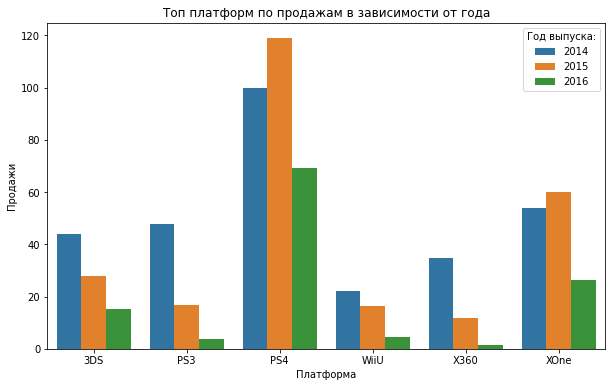

In [45]:
platform_sales_tops = sales_platform[(sales_platform['platform'] == 'PS4') 
                                            | (sales_platform['platform'] == 'XOne') 
                                            | (sales_platform['platform'] == '3DS') 
                                            | (sales_platform['platform'] == 'PS3') 
                                            | (sales_platform['platform'] == 'X360') 
                                            | (sales_platform['platform'] == 'WiiU')]    
plt.figure(figsize=(10, 6))
sns.barplot(data = platform_sales_tops, x = 'platform', y = 'total_sales', hue = 'year_of_release')
plt.title('Топ платформ по продажам в зависимости от года')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.legend(title='Год выпуска:')
plt.show()

**Промежуточный вывод**

PS4 лидирует по продажам во всех 3-х годах, затем идет X0ne, 3DS и PS3, падают в продажах WiiU и Х360.

### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

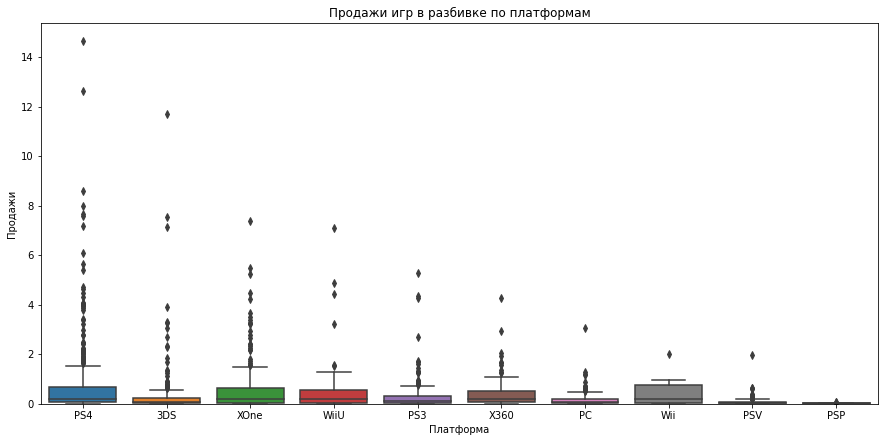

In [46]:
plt.figure(figsize=(15, 7))
sns.boxplot(x=games['platform'], y=games['total_sales'])
plt.ylim([0, None])
plt.title('Продажи игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

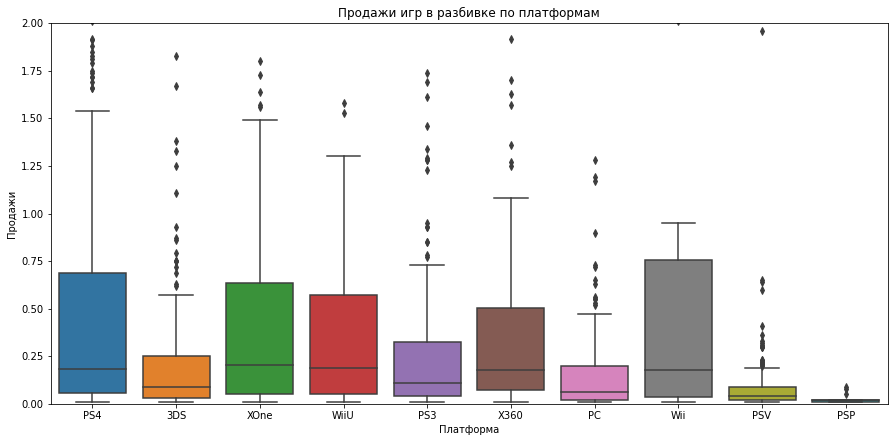

In [47]:
plt.figure(figsize=(15, 7))
sns.boxplot(x=games['platform'], y=games['total_sales'])
plt.ylim([0, 2])
plt.title('Продажи игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Продажи')
plt.show()

**Промежуточный вывод**

Из графика без ограничений по продажам видно, что у PS4 больше всего разброс в продажах достигающий 12 млн. Больше всего медиана по продажам у WiiU около 0,45, затем идет XOne со значением 0,30, PS4 - 0,26 и 3DS - 0,25. 

### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. 

In [48]:
games_ps4 = games[(games['platform'] == 'PS4') & (games['critic_score'] > 0)]

Постройте диаграмму рассеяния.

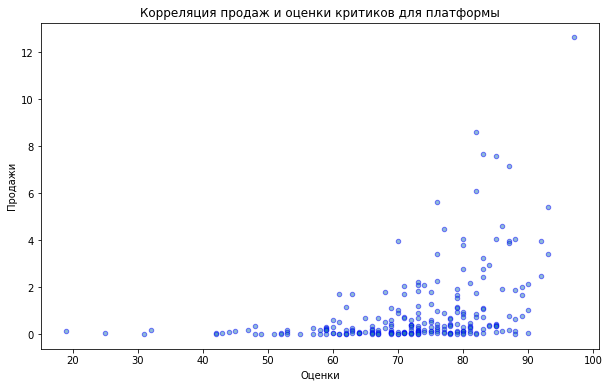

In [49]:
games_ps4.plot(kind='scatter', x='critic_score', y='total_sales', ec='blue', alpha = 0.5, figsize=(10,6))
plt.title('Корреляция продаж и оценки критиков для платформы')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.show()

Посчитайте корреляцию между отзывами критиков и продажами. 

In [50]:
games_ps4['total_sales'].corr(games_ps4['critic_score'])

0.40266141068104083

In [51]:
games_ps4 = games[(games['platform'] == 'PS4') & (games['user_score'] > 0)]

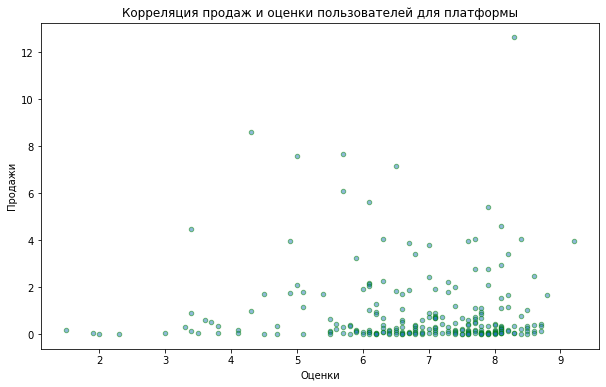

In [52]:
games_ps4.plot(kind='scatter', x='user_score', y='total_sales', ec='green', alpha = 0.5, figsize=(10,6))
plt.title('Корреляция продаж и оценки пользователей для платформы')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.show()

Посчитайте корреляцию между отзывами пользователей и продажами.

In [53]:
games_ps4['total_sales'].corr(games_ps4['user_score'])

-0.040131589472697356

**Промежуточный вывод**

На основании диаграммы рассеивания по продажам и отзывам критиков, можно сделать вывод, что с увеличением числа оценок от критиков и растут продажи. Наблюдается положительная корреляция, чем больше оценков критиков, тем больше количество продаж.

На основании диаграммы рассеивания по продажам и отзывам пользователей, можно сделать вывод, что с увеличением числа оценок от пользователей продажи не растут. Прослеживается отрицательная корреляция пользовательских оценок и продаж игр. Можно сделать вывод что покупатели не руководствуются отзывами пользователей при прокупке.

### Соотнесите выводы с продажами игр на других платформах.

In [54]:
platform_sales.head(6)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98


In [55]:
corr_platforms = ['XOne', '3DS', 'PS3', 'X360', 'WiiU']

In [56]:
# Комментарий ревьюера 00
temp = games.copy() # создаем копию датасета до преобразования
len(temp)

1689

In [57]:
#games = games[(games['user_score'] > 0) & (games['critic_score'] > 0)]

In [58]:
# Комментарий ревьюера 00
print(len(temp[(temp['user_score'] > 0)]))
print(len(temp[(temp['critic_score'] > 0)]))
print(len(temp[(temp['user_score'] > 0) & (temp['critic_score'] > 0)]))

888
718
704


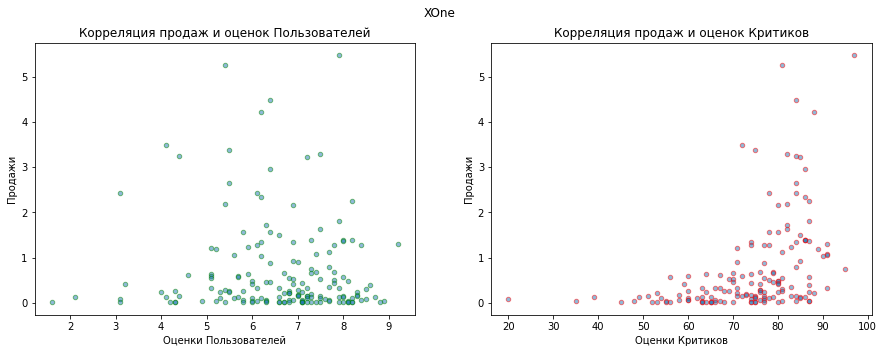

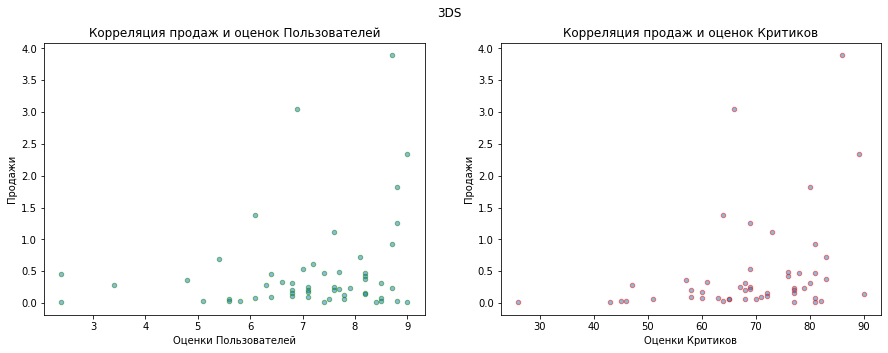

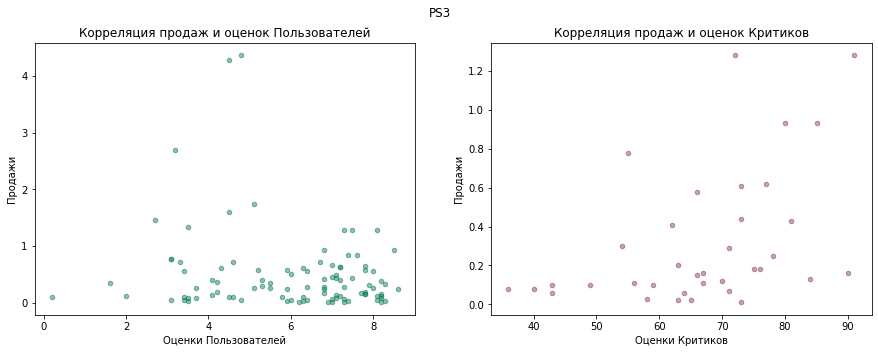

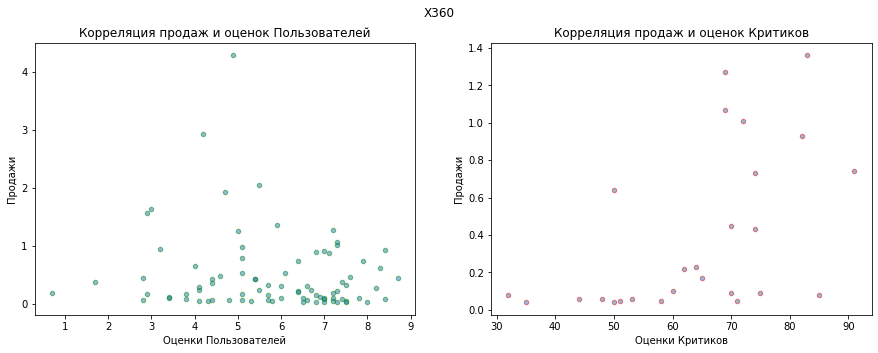

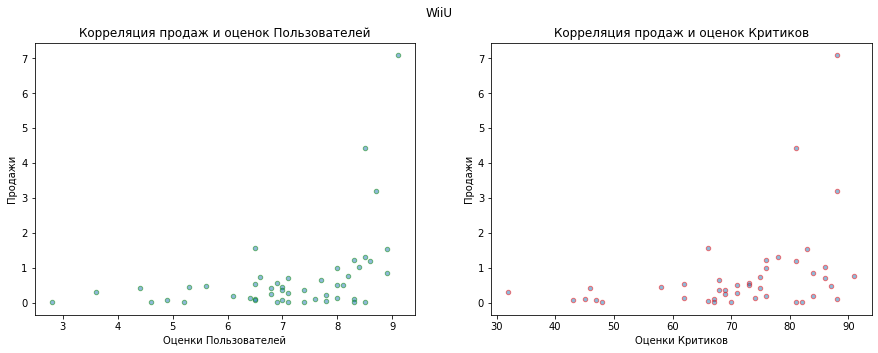

In [59]:
for pl in corr_platforms:
    fig, ax = plt.subplots(1,2, figsize = (15,5))
    ax = ax.ravel()
    games[games['user_score'] > 0].query('platform == @pl').plot(kind='scatter', x='user_score', y='total_sales', ec='green', alpha = 0.5, ax = ax[0], 
                                        xlabel='Оценки Пользователей',
                                        ylabel='Продажи',
                                        title='Корреляция продаж и оценок Пользователей'
                                       )
    games[games['critic_score'] > 0].query('platform == @pl').plot(kind='scatter', x='critic_score', y='total_sales', ec='red', alpha = 0.5, ax = ax[1],
                                        xlabel='Оценки Критиков',
                                        ylabel='Продажи',
                                        title='Корреляция продаж и оценок Критиков'
                                       )
    fig.suptitle(pl)

In [60]:
for pl in corr_platforms:
    print(pl)
    print('Отзывы Критиков')
    print(games[games['critic_score'] > 0].query('platform == @pl')['total_sales'].corr(games.query('platform == @pl')['critic_score']).round(2))
    print('Отзывы Пользователей')
    print(games[games['user_score'] > 0].query('platform == @pl')['total_sales'].corr(games.query('platform == @pl')['user_score']).round(2))
    print(' ')

XOne
Отзывы Критиков
0.43
Отзывы Пользователей
-0.07
 
3DS
Отзывы Критиков
0.31
Отзывы Пользователей
0.22
 
PS3
Отзывы Критиков
0.45
Отзывы Пользователей
-0.17
 
X360
Отзывы Критиков
0.53
Отзывы Пользователей
-0.14
 
WiiU
Отзывы Критиков
0.37
Отзывы Пользователей
0.41
 


In [61]:
print(len(temp[(temp['user_score'] > 0)]))
print(len(temp[(temp['critic_score'] > 0)]))
print(len(temp[(temp['user_score'] > 0) & (temp['critic_score'] > 0)]))

print(len(games[(games['user_score'] > 0)]))
print(len(games[(games['critic_score'] > 0)]))
print(len(games[(games['user_score'] > 0) & (games['critic_score'] > 0)]))

888
718
704
888
718
704


**Промежуточные Выводы**

Данные по корреляции между выручкой и оценками критиков и пользователей по платформам XOne, 3DS, PS3, X360, WiiU совпадает с данными по PS3, а также в общем по датафрейму. В общем, наблюдается положительная корреляция между оценками критиков и выручкой. 
Во всех случаях увеличение количества оценок критиков ведет к увеличению продаж. По оценкам пользователей и продажам нет такой положительной однозначной корреляции: у платформы XOne, X360 и PS3 отрицательная корреляция, это значит что увеличение оценок пользователей не ведет к увеличению продаж, у платформ 3DS и WiiU  положительная корреляция почти такая же как и у оценок критиков. 

In [62]:
# Комментарий ревьюера
# Проверим сколько удалено строк датасета
a, b = len(temp), len(games)
print(a, b, round((a-b)/a*100, 2))

1689 1689 0.0


### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами? 

Посмотрите на общее распределение игр по жанрам.

In [63]:
games.groupby('genre')['name'].count().sort_values(ascending=False)

genre
Action          619
Role-Playing    221
Adventure       185
Sports          161
Shooter         128
Misc            113
Racing           69
Fighting         60
Simulation       44
Platform         38
Strategy         37
Puzzle           14
Name: name, dtype: int64

In [64]:
sales_by_genre = games.groupby('genre').agg({'total_sales':['sum']})
sales_by_genre.columns = [
    'Сумма'
]
sales_by_genre.sort_values(by='Сумма', ascending = False)

,Сумма
genre,
Action,199.36
Shooter,170.94
Sports,109.48
Role-Playing,101.44
Misc,37.55
Fighting,28.22
Racing,27.52
Platform,18.09
Adventure,17.55


Самые прибыльные жанры боевики, спортивные, шутеры, ролевые. Наименее прибыльные: приключенческий, стратегия и головоломка.

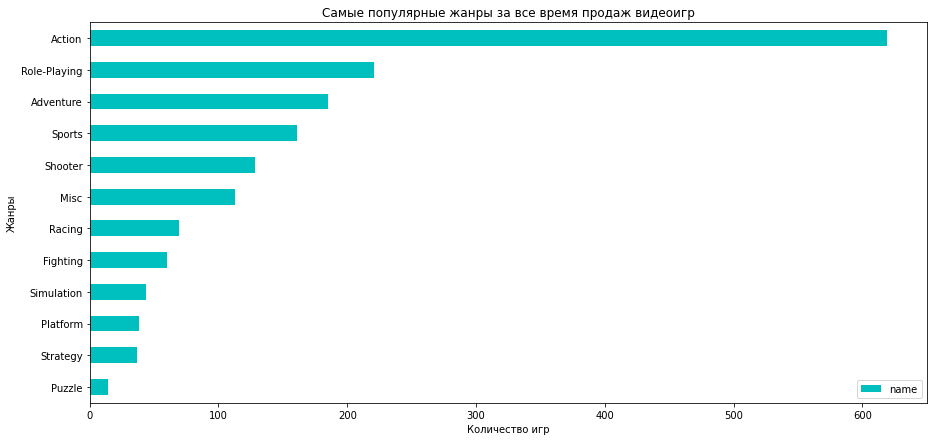

In [65]:
genre = games.pivot_table(index = 'genre', values = 'name',
                                  aggfunc = 'count').sort_values('name', ascending = True)

genre.plot(kind='barh', figsize=(15, 7), color='c')
plt.title('Cамые популярные жанры за все время продаж видеоигр')
plt.xlabel('Количество игр')
plt.ylabel('Жанры')
plt.show()

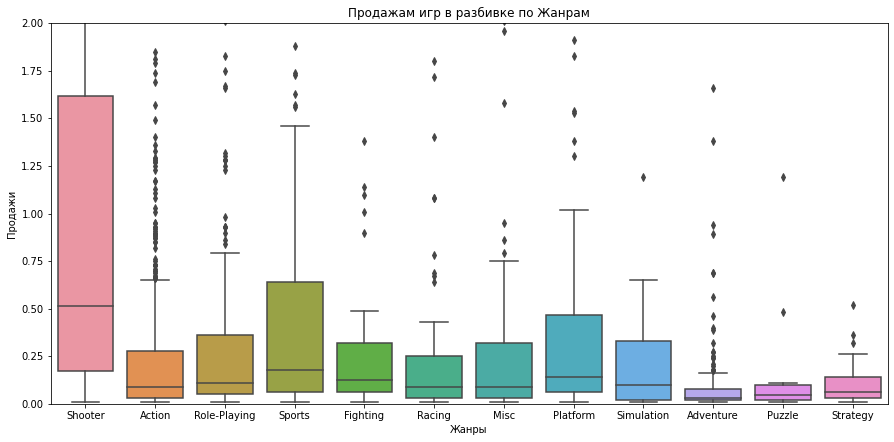

In [66]:
plt.figure(figsize=(15, 7))
sns.boxplot(x=games['genre'], y=games['total_sales'])
plt.ylim([0, 2])
plt.title('Продажам игр в разбивке по Жанрам')
plt.xlabel('Жанры')
plt.ylabel('Продажи')
plt.show()

**Промежуточные выводы**

Самые прибыльные жанры боевики, спортивные, шутеры, ролевые. Наименее прибыльные: приключенческий, стратегия и головоломка.

Самое высокие мелианные продажи у шутер, спортивные, боевики, ролевые и самые низкие у приключенческие, паззлы и игры-стратегии. 

**Вывод по разделу**

**3.1** Больше всего игр выпускалось в 2008 и 2009 годах, далее идет 2010, 2007, 2011. До 1994 года выпускалось меньше 100 игр в год.

**3.2** Во всем датафрейме больше всего продаж на платформах PlayStation 2 и Xbox 360, PS3, Wii, DS, далее PlayStation.

Исходя из графика распределения самых прибыльных платформ по годам, можно сделать вывод о том, что большинство новых платформ быстро набирают популярность, но в течение 6-10 лет их популярность снижается при выходе новой платформы. Посчитав можно сделать вывод, что средний срок жизни платформы - 7 лет.

Удалим выпуск 1985 для платформы DS.

**3.3** Возьмите данные за соответствующий актуальный период. Далее будем рассматривать период включая и после 2014. Исходя из построенного графика, можно сделать вывод о том, что большинство новых платформ быстро набирают популярность, но в течение 6-10 лет их популярность снижается при выходе новой платформы. Средний срок жизни платформы - 7 лет.

**3.4** Будем рассматривать период включая и после 2014, профильтровали данные. 

**3.5** PS4 лидирует по продажам во всех 3-х годах 2014-2016, затем идет X0ne, 3DS и PS3, падают в продажах WiiU и Х360.

**3.6** Медиана по топовым платформам варьируется от 0,16 до 0,25 млн долларов прибыли за игру. Примерно одинаковое среднее у X360 и PS3, чуть большее чем у XOne.  

**3.7** Для анализа данного вопроса взяли популярную платформу PS4. На основании диаграммы рассеивания по продажам и отзывам критиков, можно сделать вывод, что с увеличением числа оценок от критиков и растут продажи. Наблюдается положительная корреляция, чем больше оценков критиков, тем больше количество продаж.

На основании диаграммы рассеивания по продажам и отзывам пользователей, можно сделать вывод, что с увеличением числа оценок от пользователей продажи не растут. Прослеживается отрицательная корреляция пользовательских оценок и продаж игр. Можно сделать вывод что покупатели не руководствуются отзывами пользователей при прокупке.

**3.8** Данные по корреляции между выручкой и оценками критиков и пользователей по платформам XOne, 3DS, PS3, X360, WiiU совпадает с данными по PS3, а также в общем по датафрейму. В общем, наблюдается положительная корреляция между оценками критиков и выручкой. Во всех случаях увеличение количества оценок критиков ведет к увеличению продаж. По оценкам пользователей и продажам нет такой положительной однозначной корреляции: у платформы XOne, X360 и PS3 отрицательная корреляция, это значит что увеличение оценок пользователей не ведет к увеличению продаж, у платформ 3DS и WiiU положительная корреляция почти такая же как и у оценок критиков.

**3.9** Самые прибыльные жанры боевики, спортивные, шутеры, ролевые. Наименее прибыльные: приключенческий, стратегия и головоломка. Самое высокие мелианные продажи у шутер, спортивные, боевики, ролевые и самые низкие у приключенческие, паззлы и игры-стратегии. 

## Шаг 4. Составьте портрет пользователя каждого региона

### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

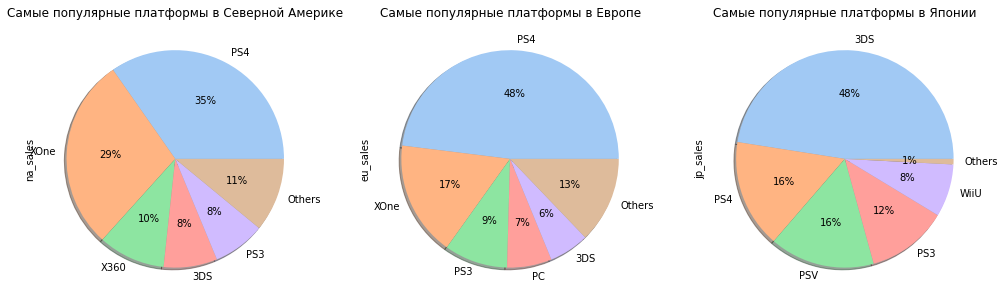

In [67]:
reg_names = {'na_sales':'Северной Америке', 'eu_sales':'Европе', 'jp_sales':'Японии'}
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
for i, region in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    platform_sales = games.pivot_table(index=['platform'], values=region,  aggfunc = 'sum')
    platform_sales = platform_sales.sort_values(by=region, ascending=False)
    reduced_platform_sales = pd.concat((platform_sales[:5], pd.DataFrame(platform_sales[5:].sum()).T.rename({0:'Others'})))
    palette = sns.color_palette('pastel')[ 0:6 ]
    reduced_platform_sales.plot.pie(y=region, autopct='%1.0f%%', 
                               shadow = True, colors = palette, normalize=True,
                               ax=axs[i])
    axs[i].set_title('Самые популярные платформы в ' + reg_names[region])
    axs[i].legend('', frameon=False)
plt.show()

**Промежуточный вывод**

Самые популярные платформы в Северной Америке в порядке убывания: PS4, X0ne, X360, 3DS, PC, PS3, Others.
Самые популярные платформы в Европе в порядке убывания: PS4, X0ne, PS3, PC, 3DS, Others.
Самые популярные платформы в Японии в порядке убывания: 3DS, PS4, PSV, PS3, WiiU, Others.

### Самые популярные жанры (топ-5). Поясните разницу.

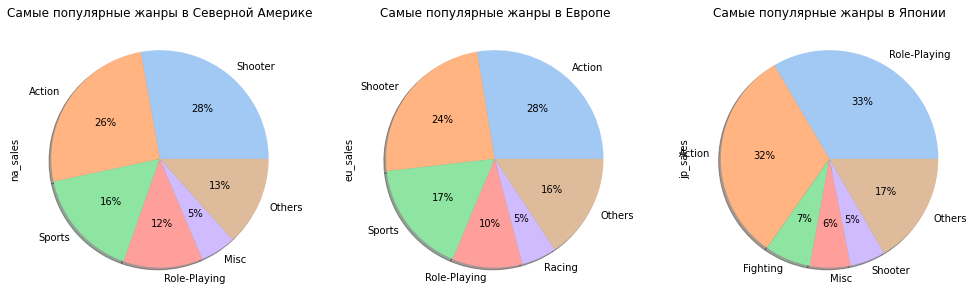

In [68]:
reg_names = {'na_sales':'Северной Америке', 'eu_sales':'Европе', 'jp_sales':'Японии'}
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
for i, region in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    platform_sales = games.pivot_table(index=['genre'], values=region,  aggfunc = 'sum')
    platform_sales = platform_sales.sort_values(by=region, ascending=False)
    reduced_platform_sales = pd.concat((platform_sales[:5], pd.DataFrame(platform_sales[5:].sum()).T.rename({0:'Others'})))
    palette = sns.color_palette('pastel')[ 0:6 ]
    reduced_platform_sales.plot.pie(y=region, autopct='%1.0f%%', 
                               shadow = True, colors = palette, normalize=True,
                               ax=axs[i])
    axs[i].set_title('Самые популярные жанры в ' + reg_names[region])
    axs[i].legend('', frameon=False)
plt.show()

**Промежуточный вывод** 

Самые популярные жанры в Северной Америке Shooter, Action, Sports, Role_playing, Misc, Others. 
Самые популярные жанры в Европе Action, Shooter, Sports, Role-Playing, Racing, Others. 
Самые популярные жанры в Японии Role-Playing, Action, Fighting, Misc, Shooter, Others. 

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [69]:
ESRB_dict = {'E': 'Для всех', 'M': '> 17 лет', 'T': '13-19 лет', 'E10+': '>10 лет', 'K-A': 'Для всех(устар.)'}

In [70]:
games['ESRB_desc'] = games[games['rating'].notnull()]['rating'].map(ESRB_dict)

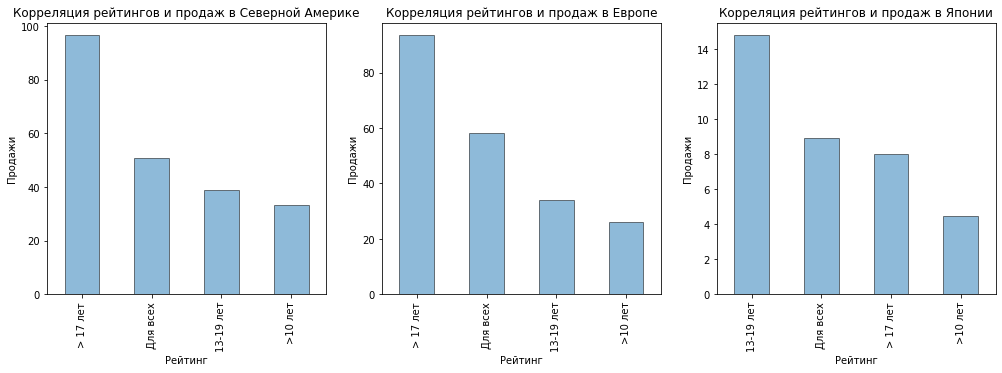

In [71]:
reg_names = {'na_sales':'Северной Америке', 'eu_sales':'Европе', 'jp_sales':'Японии'}
fig, axs = plt.subplots(1, 3, figsize=(17, 5))
for i, region in enumerate(['na_sales', 'eu_sales', 'jp_sales']):
    platform_sales = games.pivot_table(index=['ESRB_desc'], values=region,  aggfunc = 'sum')
    platform_sales = platform_sales.sort_values(by=region, ascending=False)
    platform_sales.plot(kind='bar', alpha = 0.5, edgecolor='black', xlabel='Рейтинг', ylabel='Продажи', ax=axs[i])
    axs[i].set_title('Корреляция рейтингов и продаж в ' + reg_names[region])
    axs[i].legend('', frameon=False)
plt.show()

**Промежуточный вывод**

В Северной Америке больше всего выручки получается по убыванию у игр с рейтингом "для лиц старше 17 лет", далее "Для всех", '13-19 лет' и для лиц старше 10 лет. 
В Европе больше всего выручки получается по убыванию у игр с рейтингом "для лиц старше 17 лет", далее "Для всех", '13-19 лет' и "для лиц старше 10 лет". 
В Японии больше всего выручки получатся по убыванию у игр с рейтингом "13-19 лет", "Для всех", затем "для лиц старше 17 лет" и меньше всего "для лиц старше 10 лет". 

**Вывод по разделу**

**4.1** Самые популярные платформы в Северной Америке в порядке убывания: PS4, X0ne, X360, 3DS, PC, PS3, Others.
Самые популярные платформы в Европе в порядке убывания: PS4, X0ne, PS3, PC, 3DS, Others.
Самые популярные платформы в Японии в порядке убывания: 3DS, PS4, PSV, PS3, WiiU, Others. 

**4.2** Самые популярные жанры в Северной Америке Shooter, Action, Sports, Role_playing, Misc, Others. 
Самые популярные жанры в Европе Action, Shooter, Sports, Role-Playing, Racing, Others. 
Самые популярные жанры в Японии Role-Playing, Action, Fighting, Misc, Shooter, Others. 

**4.3** В Северной Америке больше всего выручки получается по убыванию у игр с рейтингом "для лиц старше 17 лет", далее "Для всех", '13-19 лет' и для лиц старше 10 лет. 
В Европе больше всего выручки получается по убыванию у игр с рейтингом "для лиц старше 17 лет", далее "Для всех", '13-19 лет' и "для лиц старше 10 лет". 
В Японии больше всего выручки получатся по убыванию у игр с рейтингом "13-19 лет", "Для всех", затем "для лиц старше 17 лет" и меньше всего "для лиц старше 10 лет". 

## Шаг 5. Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Гипотеза 1

Важно понять, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Выдвинем гипотезу:
    средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н0: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1: средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

In [72]:
games[games['platform'] == 'XOne'].sort_values(by='year_of_release')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ESRB_desc
5321,Sniper Elite 3,XOne,2014,Shooter,0.20,0.11,0.0,0.03,63.0,6.6,M,0.34,> 17 лет
4747,Rocksmith 2014,XOne,2014,Misc,0.29,0.08,0.0,0.04,-1.0,-1.0,unknown,0.41,NaN
4691,NHL 15,XOne,2014,Sports,0.31,0.06,0.0,0.04,59.0,3.2,E10+,0.41,>10 лет
7632,Sleeping Dogs,XOne,2014,Action,0.10,0.09,0.0,0.02,-1.0,-1.0,unknown,0.21,NaN
1798,Sunset Overdrive,XOne,2014,Shooter,0.63,0.40,0.0,0.10,81.0,7.7,M,1.13,> 17 лет
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8491,Mirror's Edge Catalyst,XOne,2016,Platform,0.09,0.06,0.0,0.01,72.0,4.4,T,0.16,13-19 лет
8339,Deus Ex: Mankind Divided,XOne,2016,Role-Playing,0.09,0.06,0.0,0.01,83.0,7.2,M,0.16,> 17 лет
16660,Prison Architect,XOne,2016,Action,0.01,0.00,0.0,0.00,74.0,6.7,unknown,0.01,NaN
13224,Ghostbusters (2016),XOne,2016,Action,0.04,0.00,0.0,0.01,-1.0,-1.0,unknown,0.05,NaN


In [73]:
games[games['platform'] == 'PC'].sort_values(by='year_of_release', ascending=True)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ESRB_desc
458,The Sims 4,PC,2014,Simulation,1.00,1.82,0.0,0.23,70.0,3.9,T,3.05,13-19 лет
8589,The Crew,PC,2014,Racing,0.00,0.15,0.0,0.01,71.0,6.4,T,0.16,13-19 лет
8657,Wildstar,PC,2014,Role-Playing,0.08,0.07,0.0,0.01,82.0,7.4,T,0.16,13-19 лет
9035,Alien: Isolation,PC,2014,Shooter,0.00,0.14,0.0,0.01,81.0,8.4,M,0.15,> 17 лет
9946,Tropico 5,PC,2014,Simulation,0.02,0.09,0.0,0.01,75.0,7.0,T,0.12,13-19 лет
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12891,Hearts of Iron IV,PC,2016,Strategy,0.00,0.05,0.0,0.00,83.0,6.9,unknown,0.05,NaN
12834,Rocket League,PC,2016,Sports,0.01,0.04,0.0,0.00,86.0,8.2,E,0.05,Для всех
12719,Street Fighter V,PC,2016,Fighting,0.00,0.05,0.0,0.00,74.0,2.9,T,0.05,13-19 лет
14081,Homefront: The Revolution,PC,2016,Shooter,0.01,0.02,0.0,0.00,54.0,3.5,M,0.03,> 17 лет


XOne на рынке с 2013, тогда как PC c 2006. Но наш датасет ограничен 2006 годом, так что в данном случае обе платформы на рынке 3 года.

In [74]:
xbox_score = games[games['user_score'] > 0].query('platform == "XOne" and user_score.isna() == False')['user_score']
xbox_score

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 165, dtype: float64

In [75]:
pc_score = games[games['user_score'] > 0].query('platform == "PC" and user_score.isna() == False')['user_score']
pc_score

458      3.9
1530     5.4
1730     7.9
2303     5.7
2784     5.9
        ... 
16456    8.3
16463    6.8
16509    7.9
16518    1.4
16692    7.6
Name: user_score, Length: 122, dtype: float64

In [76]:
alpha = 0.05 

results = st.ttest_ind(xbox_score, pc_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668832
Не получилось отвергнуть нулевую гипотезу


Гипотеза 1: Не получилось отвергнуть нулевую гипотезу: P-value оказалоось больше 5%. То есть, с вероятностью больше 5% можно получить наблюдаемое значение. Предположение верно и средние пользовательские рейтинги для Xbox One и PC равны между собой.

### Средние пользовательские рейтинги жанров Action и Sports разные.

Гипотеза 2

Важно понять, что средние пользовательские рейтинги жанров Action и Sports разные

Выдвинем гипотезу:
    средние пользовательские рейтинги жанров Action и Sports одинаковые

Н0: средние пользовательские рейтинги жанров Action и Sports равны

Н1:  средние пользовательские рейтинги жанров Action и Sports разные


In [77]:
action_score = games[games['user_score'] > 0].query('genre == "Action" and user_score.isna() == False')['user_score']
action_score

42       8.3
165      7.9
231      8.1
295      6.3
304      4.9
        ... 
16544    6.8
16597    6.0
16652    8.5
16660    6.7
16692    7.6
Name: user_score, Length: 297, dtype: float64

In [78]:
sports_score = games[games['user_score'] > 0].query('genre == "Sports" and user_score.isna() == False')['user_score']
sports_score

77       4.3
94       5.0
143      5.7
264      4.5
314      6.7
        ... 
16120    6.3
16142    8.8
16146    6.9
16518    1.4
16643    6.6
Name: user_score, Length: 127, dtype: float64

In [79]:
alpha = 0.05 

results = st.ttest_ind(action_score, sports_score, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


**Вывод по разделу**

**5.1** Гипотеза 1: Не получилось отвергнуть нулевую гипотезу: P-value оказалоось больше 5%. То есть, с вероятностью больше 5% можно получить наблюдаемое значение. Предположение верно и средние пользовательские рейтинги для Xbox One и PC равны между собой.

**5.2** Гипотеза 2: Нулевая Гипотеза Отвергнута: P-value оказалоось меньше 5%. То есть, с вероятностью меньше 5% можно получить наблюдаемое значение. Предположение неверно и средние пользовательские рейтинги жанров Action и Sports разные, вероятность получить равные или более удаленные значения случайно составляет менее 5%.

## Шаг 6. Общий Вывод

В процессе исследования было выполнено:

#  1. Загрузка данных:
Считали CSV-файлы с данными с помощью библиотеки pandas и сохранили их в датафреймы. 

Games содержит:
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке
- EU_sales — продажи в Европе
- JP_sales — продажи в Японии
- Other_sales — продажи в других странах
- Critic_Score — оценка критиков
- User_Score — оценка пользователей
- Rating — рейтинг от организации ESRB


# 2. Подготовка данных:

**2.1** Название столбцов приведено к регистру в lower_case. 

**2.2** В колонках year_of_release и user_score изменены типы данных столбцов: 'year_of_release' на int, 'user_score' на float 

**2.3** Дубликаты отсудствуют в датафрейме, а также в столбцах имени, платформе и году релиза. В данных присудствуют пропуски которые предстоит обработать для дальнейшего анализа. Есть много причин появления пропусков, например технические - ошибки системы, при передаче, выгрузке данных или допущены пользователем - неправильный ввод или нежелание (сокрытие) информации. 

В столбцах name, genre были удалены две строки без названия игр и жанров которые ме не можем заполнить. Пропуски в столбце rating заполнили unknown так как мы не можем найти рейтинги для пустых значений. Пропуски в столбце user_score, critic_score, year_of_release заполним значениями -1, так как мы также не можем их заполнять серединными значениями или найти значения для них из других столбцов. 

В колонке user_score, tbd подразумевает что игра не имеет рейтингов. Но нам нужно заполнить данные числом, поэтому заменим на тип данных c tbd на float, а затем заполним пустые значения -1 

**2.4** Посчитали суммарные продажи во всех регионах и запизали в отдельный столбец total_sales. 


# 3. Провели исследовательский анализ данных:


**3.1** Больше всего игр выпускалось в 2008 и 2009 годах, далее идет 2010, 2007, 2011. До 1994 года выпускалось меньше 100 игр в год.

**3.2** Во всем датафрейме больше всего продаж на платформах PlayStation 2 и Xbox 360, PS3, Wii, DS, далее PlayStation.

Исходя из графика распределения самых прибыльных платформ по годам, можно сделать вывод о том, что большинство новых платформ быстро набирают популярность, но в течение 6-10 лет их популярность снижается при выходе новой платформы. Посчитав можно сделать вывод, что средний срок жизни платформы - 7 лет.

Удалим выпуск 1985 для платформы DS.

**3.3** Возьмите данные за соответствующий актуальный период. Далее будем рассматривать период включая и после 2014. Исходя из построенного графика, можно сделать вывод о том, что большинство новых платформ быстро набирают популярность, но в течение 6-10 лет их популярность снижается при выходе новой платформы. Средний срок жизни платформы - 7 лет.

**3.4** Будем рассматривать период включая и после 2014, профильтровали данные. 

**3.5** PS4 лидирует по продажам во всех 3-х годах 2014-2016, затем идет X0ne, 3DS и PS3, падают в продажах WiiU и Х360.

**3.6** Медиана по топовым платформам варьируется от 0,16 до 0,25 млн долларов прибыли за игру. Примерно одинаковое среднее у X360 и PS3, чуть большее чем у XOne.  

**3.7** Для анализа данного вопроса взяли популярную платформу PS4. На основании диаграммы рассеивания по продажам и отзывам критиков, можно сделать вывод, что с увеличением числа оценок от критиков и растут продажи. Наблюдается положительная корреляция, чем больше оценков критиков, тем больше количество продаж.

На основании диаграммы рассеивания по продажам и отзывам пользователей, можно сделать вывод, что с увеличением числа оценок от пользователей продажи не растут. Прослеживается отрицательная корреляция пользовательских оценок и продаж игр. Можно сделать вывод что покупатели не руководствуются отзывами пользователей при прокупке.

**3.8** Данные по корреляции между выручкой и оценками критиков и пользователей по платформам XOne, 3DS, PS3, X360, WiiU совпадает с данными по PS3, а также в общем по датафрейму. В общем, наблюдается положительная корреляция между оценками критиков и выручкой. Во всех случаях увеличение количества оценок критиков ведет к увеличению продаж. По оценкам пользователей и продажам нет такой положительной однозначной корреляции: у платформы XOne, X360 и PS3 отрицательная корреляция, это значит что увеличение оценок пользователей не ведет к увеличению продаж, у платформ 3DS и WiiU положительная корреляция почти такая же как и у оценок критиков.

**3.9** Самые прибыльные жанры боевики, спортивные, шутеры, ролевые. Наименее прибыльные: приключенческий, стратегия и головоломка. Самое высокие мелианные продажи у шутер, спортивные, боевики, ролевые и самые низкие у приключенческие, паззлы и игры-стратегии. 

# 4. Портрет пользователя каждого региона

**4.1** Самые популярные платформы в Северной Америке в порядке убывания: PS4, X0ne, X360, 3DS, PC, PS3, Others.
Самые популярные платформы в Европе в порядке убывания: PS4, X0ne, PS3, PC, 3DS, Others.
Самые популярные платформы в Японии в порядке убывания: 3DS, PS4, PSV, PS3, WiiU, Others. 

**4.2** Самые популярные жанры в Северной Америке Shooter, Action, Sports, Role_playing, Misc, Others. 
Самые популярные жанры в Европе Action, Shooter, Sports, Role-Playing, Racing, Others. 
Самые популярные жанры в Японии Role-Playing, Action, Fighting, Misc, Shooter, Others. 

**4.3** В Северной Америке больше всего выручки получается по убыванию у игр с рейтингом "для лиц старше 17 лет", далее "Для всех", '13-19 лет' и для лиц старше 10 лет. 
В Европе больше всего выручки получается по убыванию у игр с рейтингом "для лиц старше 17 лет", далее "Для всех", '13-19 лет' и "для лиц старше 10 лет". 
В Японии больше всего выручки получатся по убыванию у игр с рейтингом "13-19 лет", "Для всех", затем "для лиц старше 17 лет" и меньше всего "для лиц старше 10 лет". 

# 5. Проверка гипотез

**5.1 Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые:**
- Гипотеза 1: Не получилось отвергнуть нулевую гипотезу: P-value оказалоось больше 5%. То есть, с вероятностью больше 5% можно получить наблюдаемое значение. Предположение верно и средние пользовательские рейтинги для Xbox One и PC равны между собой.

**5.2 Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные:**
- Гипотеза 2: Нулевая Гипотеза Отвергнута: P-value оказалоось меньше 5%. То есть, с вероятностью меньше 5% можно получить наблюдаемое значение. Предположение неверно и средние пользовательские рейтинги жанров Action и Sports не одинаковые, вероятность получить равные или более удаленные значения случайно составляет менее 5%.



**Анализ показал, чтобы продукт был потенциально успешным необходимо:**

**Игра должна быть разработана для платформ PS4 или XOne для продаж в Америке или Европе и для 3DS если рынок в Японии.  Разрабатывать игры стоит для популярных жанров - это экшен, шутеры, спортивные и ролевые игры. Рейтинг ESRB должен быть для лиц от 17 лет для Америки и Европы или от лиц 13-19 лет для Японии. Отзывы критиков имеют значение для всех платформ, поэтому для увеличения продаж стоит повышать количество положительных оценок критиков. Оценки пользователей на продажи не оказывает существенного влияния. Однако стоит заметить, что если пользовательский рейтинг все-таки будет важен создателям игры, то необходимо знать, что для 3DS платформы отзывы пользователей положительно вляют на продажи.**